# PyTorch
- facebook이 만든 python을 위한 오픈소스 머신러닝 라이브러리
- GPU사용이 가능하기 때문에 속도가 빠릅니다.
- TensorFlow가 먼저 나와서 현재까지 TensorFlow의 사용자가 더 많지만 비직관적인 구조와 높은 난이도로 인해 최근에는 PyTorch사용자가 늘어나고 있습니다
- TensorFlow가 비직관적인 구조 문제를 해결하기 위해서 2.0에서 Keras를 받아들입니다
- Microsoft의 프레임워크가 모델 전환이 가능합니다

## 1. PyTorch 설치
- pip3 install torch torchvision
또는 
- conda install pytorch torchvision -c pytorch

## 2. GPU사용하려면?
- CUDA설치
https://developer.nvidia.com/cuda-toolkit-archive
- cuDNN 설치 : CUDA와 반드시 함께 설치해야 합니다.

In [ ]:
import torch
x = torch.rand(5,3)
print(x)

tensor([[0.1464, 0.2896, 0.2896],
        [0.9665, 0.9377, 0.1421],
        [0.8131, 0.2588, 0.2090],
        [0.9637, 0.0132, 0.6654],
        [0.5492, 0.1162, 0.5590]])


## 3. Tensor
- 데이터를 표현하는 단위입니다

### 1) Scalar
- 상숫값으로 하나의 값을 표현할 때 1개의 수치로 표현한 것

In [ ]:
# 스칼라는 하나의 값을 의미합니다
scalar_data = torch.tensor([1.0])
print(scalar_data)

tensor([1.])


### 2) Vector
- 원래의 의미는 데이터의 모임이지만, 프로그래밍 언어에서는 Collection이라는 표현으로 많이 사용됩니다
- 1차원으로 모인 데이터의 집합입니다
- Vector끼리 연산을 하면 동일한 위치의 데이터끼리 연산을 수행합니다.
- torch에서도 numpy의 ndarray에서 사용했던 대다수의 연산을 제공합니다.

In [ ]:
vec1 = torch.tensor([1.0, 2.0])
vec2 = torch.tensor([4.0, 5.0])

print(vec1 + vec2)

# numpy의 거의 모든 연산 함수를 torch가 제공
# 행과 열 단위로 계산하므로 연산이 안되어야 맞지만 하나의 vector를 열로 보고 연산을 수행합니다
print(torch.dot(vec1, vec2))

tensor([5., 7.])
tensor(14.)


- 구조가 다른 두 벡터를 더할 경우 에러 발생

In [ ]:
## 구조가 다를 경우 에러가 발생합니다
vec1 = torch.tensor([1.0, 2.0])
vec2 = torch.tensor([4.0, 5.0, 6.0])

print(vec1 + vec2)

RuntimeError: ignored

### 3) Matrix
- Maxric는 행과 열의 구조를 벡터의 모임으로 우리가 보통 테이블이라고 부르는 것은 Matrix입니다
- 행렬 곱 연산(내적)을 구하는 메소드로 matmul을 제공합니다.

In [ ]:
matrix1 = torch.tensor([[1, 2],
                        [3, 4]])
matrix2 = torch.tensor([[5, 6],
                        [7, 8]])
print(torch.matmul(matrix1, matrix2))

tensor([[19, 22],
        [43, 50]])


### 4) Tensor
- 통상적으로 Tensor라고 부르는 것은 3차원 이상입니다
- Matrix의 배열입니다

#### Tensor의 생성방법
#### 직접 생성

In [ ]:
tensor1 = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
tensor1

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

## 4. GPU사용 가능 여부 확인
- torch.cuda.is_available()가 GPU사용이 가능한지 True / False로 반환합니다

In [ ]:
import torch
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print('torch version : ', torch.__version__)
print('DEVICE : ', DEVICE)

torch version :  1.9.0+cu102
DEVICE :  cuda


## 5. Autograd
- PyTorch의 자동 미분 엔진
- 신경망이 역전파(Back Propagation)를 사용하기 때문에 파라미터를 업데이트하는 방법을 구현하기 위한 엔진입니다.

### 4가지의 값
#### BATCH_SIZE
- 딥 러닝 모델에서 파라미터를 업데이트할 때 계산되는 데이터의 개수
#### INPUT_SIZE
#### HIDDEN_SIZE
- 운둔 층
#### OUPUT_SIZE
- 최종으로 출력되는 값을 벡터의 크기라고 말합니다.
- 예를 들어 MINIST의 output은 숫자0-9까지의 10가지 모양인데 실제로는 각 클래스(숫자 0~9까지)에 해당하는 확률을 리턴하기 때문에 10차원으로 출력해야 합니다.
(회귀는 하나의 값을 받지만 , 분류는 0이나 1이될 확률을 받습니다.)
- 원 핫 인코딩한 결과라고 생각해야 합니다.



```
# nput size가 (64, 1000) 인 데이터를 (1000, 100) 크기의 행렬과 행렬 곱을 계산하기 위한 수입니다
BATCH_SIZE = 64
INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 10
```

## MLP(Multi Layer Perceptron)
- 퍼셉트론의 한계를 극복하기 위해 중간에 Hidden Layer를 추가하여 여러 Layer를 쌓아올린 모델입니다.
- 여러 개의 Layer를 이용해서 비선형 문제를 해결하는데 Lauer가 추가되면 깊이기 깊어져 Deep Learning이라고 부릅니다.


### 사람의 손글씨를 분류하기 위한 MLP설계
- MNIST의 Target종류가 10가지

- [1. 필요한 모듈 임포트](#1.-모듈-import)
- [2. 장비 확인](#2.장비-설정)
- [3. 데이터 다운로드 및 분할](#3.데이터-가져오기)
- [4. 데이터 확인](#4.데이터-확인)
- [5. MLP 모델 설계](#5.-MLP-모델-설계)
- [6. Optimizer, Objectiver Function 설정](#6.-모델-객체-생성-및-Optimizer와-Loss함수-생성)
- [7. 학습을 진행하면서 모델 성능을 확인하는 함수 정의](#7.-훈련-도중-학습을-진행하면서-모델-성능을-확인하는-함수-정의)
- [8. 학습을 진행하면서 검증 데이터에 대한 모델의 성능을 확인하는 함수 정의](#8.-훈련-도중-학습을-진행하면서-검증-데이터에-대한-모델의-성능을-확인하는-함수-정의)
- [9. 학습을 수행하면서 Train, Test 데이터의 Loss 및 Accuracy 확인](#9.-학습을-수행하면서-Train,-Test-데이터의-Loss-및-Accuracy-확인)

#### 1. 모듈-import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

### pytorch 기본 모듈
import torch
# 딥러닝 모델을 만들 때 필요한 함수의 모듈
import torch.nn as nn
# 자주 사용하는 함수 모듈
import torch.nn.functional as F

# 데이터 관련 모듈
from torchvision import transforms, datasets

#### 2.장비 설정

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Device : ', DEVICE)

Device :  cuda


#### 3.데이터 가져오기
- 데이터를 다운로드 받아서 data 디렉토리에 MNIST라는 디렉토리에 저장하고 가져옴
- transform을 설정하면 텐서로 변경하고 0~1사이로 정규화도 해줍니다

In [ ]:
# 한 번에 훈련하는 크기
BATCH_SIZE = 32
# 훈련 횟수
EPOCHS = 10

train_dataset = datasets.MNIST(root = '../data/MNIST', train=True, download=True,
                              transform=transforms.ToTensor())

test_dataset = datasets.MNIST(root = '../data/MNIST', train=False,
                              transform=transforms.ToTensor())
# Pytorch딥러닝에서 사용할 형태로 데이터를 변환
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE,
                                          shuffle=False)


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw




Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw




Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### 4.데이터 확인
- 훈련데이터는 28 * 28짜리 흑백 이미지이고 32개씩 묶여 있음
- 훈련레이블은 32개짜리 스칼라 데이터가 묶여 있습니다

In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train : ', X_train.size(), ' type : ', X_train.type())
    print('y_train : ', y_train.size(), ' type : ', y_train.type())
    break


X_train :  torch.Size([32, 1, 28, 28])  type :  torch.FloatTensor
y_train :  torch.Size([32])  type :  torch.LongTensor


- 첫번째 이미지 10개 출력

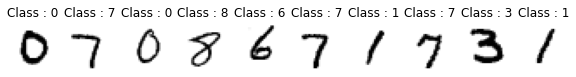

In [ ]:
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class : ' + str(y_train[i].item()))

#### 5. MLP 모델 설계

In [ ]:
class Net(nn.Module):
    # 생성자 - 초기화 메소드
    # 인스턴스를 만들기 위해서 호출하는 함수
    def __init__(self):
        # 상위 클래스의 생성자를 호출합니다.
        super(Net, self).__init__()
        # 인스턴스 변수 초기화 - 층을 쌓음
        # 출력층의 설정 값 (입력, 출력)
        self.fc1 = nn.Linear(28 * 28, 512) # +입력층
        self.fc2 = nn.Linear(512, 256) # 은닉 층
        self.fc3 = nn.Linear(256, 10) # 출력 층
    
    # Forward Propagation(순전파)을 위한 함수
    def forward(self, x) : 
        # 입력 데이터를 만들기 위해 28* 28 의 1차원 데이터로 펼침
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        
        x = self.fc2(x)
        x = F.sigmoid(x)
        
        x = self.fc3(x)
        # 출력을 결정하기 위해서 softmax함수를 이용
        # soft가 아니라  log_softmax를 호출한 이유는 역전파를 할 때
        # 로그 값을 이용하면 그래프츼 기울기가 부드럽게 변하기 때문
        # 역전화할 때 그라디언트 소실이 발생하므로 log softmax를 이용
        x = F.log_softmax(x, dim=1)
        return x
        

#### 6. 모델 객체 생성 및 Optimizer와 Loss함수 생성
- mometum(관성) : 일종의 가속도
- lr : 학습률

In [ ]:
# 모델 객체 생성
# DEVICE 장비를 이용해 MLP 모델을 완성하기 위해서
model = Net().to(DEVICE) 

# 파라미터를 업데이트할 때 반영될 Learning Rate를 0.01, Optimizer의 관성을 나타내는 momentum을 0.5로 설정 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
# Optimizer
criterion = nn.CrossEntropyLoss() # 손실 함수
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


#### 7. 훈련 도중 학습을 진행하면서 모델 성능을 확인하는 함수 정의

In [ ]:
def train(model, train_loader, optimizer, log_interval):
    # 모델 훈련 시작
    model.train() 
    # train_loader 에는 학습에 이용되는 이미지 데이터와 레이블 데이터가 Mini Batch 단위로 묶여 저장되어 있음
    # 훈련 데이터의 배치 번호와 이미지 및 레이블을 순회
    for batch_idx, (image, label) in enumerate(train_loader):
        # image와 label을 DEVICE에 할당
        image = image.to(DEVICE)
        label = label.to(DEVICE)

        # 기존에 정의한 장비에 이미지 데이터와 레이블 데이터를 할당할 경우
        # 과거에 이용한 Mini- Batch 내에 있는 이미지 데이터와 레이블 데이터를 
        # 바탕으로 계산된 Loss의 Gradient 값이 optimizer에 할당돼 있으므로 
        # optimizer의 Gradient를 초기화
        optimizer.zero_grad()
        # image를 가지고 예측
        output = model(image)
        # 손실 계산
        loss = criterion(output, label)
        # 손실 역전파
        loss.backward()
        # 파라미터 값(weight)을 업데이트
        ## weight를 업데이트 하고 사용한 optimizer는 None으로 초기화 하는 것!
        ## loss가 적을 때의 weight만 업데이트하고 
        optimizer.step()
#         print(optimizer)
        
        # 출력
        if batch_idx % log_interval == 0:
            print('Train Epoch:{}[{}/{} {:.0f}%]\tTrain Loss:{:.6f}'.
                  format(epoch, batch_idx*len(image), len(train_loader.dataset), 100*batch_idx/len(train_loader), loss.item()))

### 8. 훈련 도중 학습을 진행하면서 검증 데이터에 대한 모델의 성능을 확인하는 함수 정의

In [ ]:
def evaluate(model, test_loader):
    # 모델 훈련 시작
    model.eval()
    
    # loss를 누적할 변수
    total_loss = 0
    # 정확한 데이터의 개수를 세기 위한 변수
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            # image와 label을 DEVICE에 할당
            image = image.to(DEVICE)
            label = label.to(DEVICE)

            # image를 가지고 예측
            output = model(image)
            
            #  손실을 계산
            total_loss += criterion(output, label).item()
           
            # 정답의 개수를 계산
            # 확률이 제일 큰것
            prediction = output.max(1, keepdim = True)[1]
            # 예측과 정답의 개수가 같을 때만 correct 1 증가
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    # 손실의 평균 구하기
    total_loss /= len(test_loader.dataset)
    # 정확도
    test_accuracy = 100. * correct / len(test_loader.dataset)

    # 평균 손실과 정확도 반환
    return total_loss, test_accuracy


#### 9. 학습을 수행하면서 Train, Test 데이터의 Loss 및 Accuracy 확인

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))


Train Epoch:1[0/60000 0%]	Train Loss:2.356563


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch:1[6400/60000 11%]	Train Loss:2.287899
Train Epoch:1[12800/60000 21%]	Train Loss:2.353886
Train Epoch:1[19200/60000 32%]	Train Loss:2.347659
Train Epoch:1[25600/60000 43%]	Train Loss:2.299842
Train Epoch:1[32000/60000 53%]	Train Loss:2.308368
Train Epoch:1[38400/60000 64%]	Train Loss:2.274658
Train Epoch:1[44800/60000 75%]	Train Loss:2.268342
Train Epoch:1[51200/60000 85%]	Train Loss:2.286700
Train Epoch:1[57600/60000 96%]	Train Loss:2.213916

[EPOCH: 1], 	Test Loss: 0.0700, 	Test Accuracy: 11.57 % 

Train Epoch:2[0/60000 0%]	Train Loss:2.179025
Train Epoch:2[6400/60000 11%]	Train Loss:2.155056
Train Epoch:2[12800/60000 21%]	Train Loss:2.195235
Train Epoch:2[19200/60000 32%]	Train Loss:2.073952
Train Epoch:2[25600/60000 43%]	Train Loss:2.010473
Train Epoch:2[32000/60000 53%]	Train Loss:1.908692
Train Epoch:2[38400/60000 64%]	Train Loss:1.713514
Train Epoch:2[44800/60000 75%]	Train Loss:1.663683
Train Epoch:2[51200/60000 85%]	Train Loss:1.376444
Train Epoch:2[57600/60000 96%]

## Dropout
- 과적합과 경사 소실에 대한 문제 해결을 위한 알고리즘
- Dropout은 신경망의 학습 과정 중 Layer의 노드를 랜덤하게 Drop함으로써 Generalization효과를 가져오게 하는 테크닉 입니다.
- 실제 삭제하는 개념이 아니고 행렬에 0을 대입해서 연산을 수행하는 것입니다
- 대다수의 머신러닝 알고리즘은 Input Data, Weight, Hidden Layer모두 행렬을 가지고 연산을 수행합니다.
- 기본적으로 신경망을 디자인할 때 많이 사용하고 있는 테크닉입니다.
- Dropout을 적용하면 Test시 정확도가 일반적으로 높아집니다.
- epoch를 높게 설정해야 합니다.

### Dropout를 적용한 신경망 모델 설계

In [ ]:
class Net(nn.Module):
    # 생성자 - 초기화 메소드
    # 인스턴스를 만들기 위해서 호출하는 함수
    def __init__(self):
        # 상위 클래스의 생성자를 호출합니다.
        super(Net, self).__init__()
        # 인스턴스 변수 초기화 - 층을 쌓음
        # 출력층의 설정 값 (입력, 출력)
        self.fc1 = nn.Linear(28 * 28, 512) # +입력층
        self.fc2 = nn.Linear(512, 256) # 은닉 층
        self.fc3 = nn.Linear(256, 10) # 출력 층
        # dropout설정 추가
        self.dropout_prob = 0.5
    
    # Forward Propagation(순전파)을 위한 함수
    def forward(self, x) : 
        # 입력 데이터를 만들기 위해 28* 28 의 1차원 데이터로 펼침
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        
        # dropout을 적용
        # 각 sigmoid( ) 함수의 결괏값에 대해 Dropout을 적용하는 부분
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) # 출력층에 대해선 Dropout을 적용하지 않습니다.
        
        x = self.fc3(x)
        # 출력을 결정하기 위해서 softmax함수를 이용
        # soft가 아니라  log_softmax를 호출한 이유는 역전파를 할 때
        # 로그 값을 이용하면 그래프츼 기울기가 부드럽게 변하기 때문
        # 역전화할 때 그라디언트 소실이 발생하므로 log softmax를 이용
        x = F.log_softmax(x, dim=1)
        return x

### 모델 훈련
- dropout을 안한 것이 dropout한 것보다 정확도가 높게 나왔는데 epoch가 지금 10으로 설정되어 있는데 더 늘리면 정확도가 올라갈 것입니다.

In [ ]:
# 모델 객체 생성
# DEVICE 장비를 이용해 MLP 모델을 완성하기 위해서
model = Net().to(DEVICE) 

# 파라미터를 업데이트할 때 반영될 Learning Rate를 0.01, Optimizer의 관성을 나타내는 momentum을 0.5로 설정 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
# Optimizer
criterion = nn.CrossEntropyLoss() # 손실 함수

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch:1[0/60000 0%]	Train Loss:2.389960


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch:1[6400/60000 11%]	Train Loss:2.361072
Train Epoch:1[12800/60000 21%]	Train Loss:2.215209
Train Epoch:1[19200/60000 32%]	Train Loss:2.351646
Train Epoch:1[25600/60000 43%]	Train Loss:2.393757
Train Epoch:1[32000/60000 53%]	Train Loss:2.264348
Train Epoch:1[38400/60000 64%]	Train Loss:2.273967
Train Epoch:1[44800/60000 75%]	Train Loss:2.353053
Train Epoch:1[51200/60000 85%]	Train Loss:2.295109
Train Epoch:1[57600/60000 96%]	Train Loss:2.382057

[EPOCH: 1], 	Test Loss: 0.0713, 	Test Accuracy: 11.35 % 

Train Epoch:2[0/60000 0%]	Train Loss:2.287314
Train Epoch:2[6400/60000 11%]	Train Loss:2.210031
Train Epoch:2[12800/60000 21%]	Train Loss:2.315013
Train Epoch:2[19200/60000 32%]	Train Loss:2.277717
Train Epoch:2[25600/60000 43%]	Train Loss:2.248052
Train Epoch:2[32000/60000 53%]	Train Loss:2.280923
Train Epoch:2[38400/60000 64%]	Train Loss:2.226707
Train Epoch:2[44800/60000 75%]	Train Loss:2.190344
Train Epoch:2[51200/60000 85%]	Train Loss:2.116979
Train Epoch:2[57600/60000 96%]

## 10. Activation(활성화)
- Activation(활성화) 함수는 어떤 신호를 입력받아 이를 적절히 처리해 출력해주는 함수를 의미합니다.
- MLP에서는 기본적으로 sigmoid를 사용합니다.
- Back Propagation과정 중에 시그모이드를 미분한 값을 계속 곱해주면서 Gradient값을 수정합니다.
- 계속 미분을 하기 때문에 이전 Layer로 올 수록 0으로 수렴하는 현상이 발생합니다.
- 이러한 현상을 Gradient Vanishing(경사 소실)이라고 합니다.
- 이렇게 되면 Hidden Layer를 여러 개 깊게 쌓아 사용하는 DNN의 장점이 의미가 없어지게 됩니다.

1) ReLU(Rectified Linear Unit)
- 시그모이드와 같은 비선형 활성 함수가 지니고 있는 문제점을 어느 정도 해결한 활성 함수
- 입력 값이 0이상이면 그 값을 그대로 출려갛고 0이하이면 0으로 출력합니다.

# sigmoid대신에 ReLU를 적용한 신경망 (+Dropout적용)

## 모델 생성

In [ ]:
class Net(nn.Module):
    # 생성자 - 초기화 메소드
    # 인스턴스를 만들기 위해서 호출하는 함수
    def __init__(self):
        # 상위 클래스의 생성자를 호출합니다.
        super(Net, self).__init__()
        # 인스턴스 변수 초기화 - 층을 쌓음
        # 출력층의 설정 값 (입력, 출력)
        self.fc1 = nn.Linear(28 * 28, 512) # +입력층
        self.fc2 = nn.Linear(512, 256) # 은닉 층
        self.fc3 = nn.Linear(256, 10) # 출력 층
        # dropout설정 추가
        self.dropout_prob = 0.5
    
    # Forward Propagation(순전파)을 위한 함수
    def forward(self, x) : 
        # 입력 데이터를 만들기 위해 28* 28 의 1차원 데이터로 펼침
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
#         x = F.sigmoid(x)
        x = F.relu(x) # sigmoid 대신에 ReLU적용
        
        # dropout을 적용
        # 각 sigmoid( ) 함수의 결괏값에 대해 Dropout을 적용하는 부분
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        
        x = self.fc2(x)
#         x = F.sigmoid(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) # 출력층에 대해선 Dropout을 적용하지 않습니다.
        
        x = self.fc3(x)
        # 출력을 결정하기 위해서 softmax함수를 이용
        # soft가 아니라  log_softmax를 호출한 이유는 역전파를 할 때
        # 로그 값을 이용하면 그래프츼 기울기가 부드럽게 변하기 때문
        # 역전화할 때 그라디언트 소실이 발생하므로 log softmax를 이용
        x = F.log_softmax(x, dim=1)
        return x

# Dropout + Batch Normalization + ReLU


## 모델 설계
- init은 상위클래스의 init을 호출해야합니다.

In [ ]:
class Net (nn.Module) : 
    # 다른 객체 지향 언어의 생성자 역할을 수행하는 초기화 메소드
    def __init__(self):
        super(Net, self).__init__()
        # 입력층 생성
        self.fc1 = nn.Linear(28*28, 512)
        # 은닉층 생성
        self.fc2 = nn.Linear(512, 256)
        # 출력층 생성
        self.fc3 = nn.Linear(256, 10)

        # 드롭아웃 비율을 선정
        self.dropout_prob = 0.5

        # 배치 정규화 층 생성
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    # 순방향 연산을 위한 함수
    def forward(self, x):
        # 입력 배열 펼치기
        x = x.view(-1, 28*28)
        # 입력층 생성
        x = self.fc1(x)
        x = self.batch_norm1(x)
        # relu
        x = F.relu(x)
        # dropout
        x = F.dropout(x, training=self.training, p=self.dropout_prob)

        # 은닉층 생성
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=self.dropout_prob)

        # 출력층 생성
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

### 모델 생성

In [ ]:
model = Net().to(DEVICE)
# Optimizer와 Loss 함수 생성
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

### 모델 훈련

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH:{}], \tTest Loss:{:.4f}, \tTest Accuracy:{:.2f}\n'.format(epoch, test_loss, test_accuracy))

Train Epoch:1[0/60000 0%]	Train Loss:2.432544
Train Epoch:1[6400/60000 11%]	Train Loss:0.610212
Train Epoch:1[12800/60000 21%]	Train Loss:0.473675
Train Epoch:1[19200/60000 32%]	Train Loss:0.665728
Train Epoch:1[25600/60000 43%]	Train Loss:0.377604
Train Epoch:1[32000/60000 53%]	Train Loss:0.596077
Train Epoch:1[38400/60000 64%]	Train Loss:0.106203
Train Epoch:1[44800/60000 75%]	Train Loss:0.192735
Train Epoch:1[51200/60000 85%]	Train Loss:0.219187
Train Epoch:1[57600/60000 96%]	Train Loss:0.102345

[EPOCH:1], 	Test Loss:0.0050, 	Test Accuracy:95.22

Train Epoch:2[0/60000 0%]	Train Loss:0.119467
Train Epoch:2[6400/60000 11%]	Train Loss:0.996294
Train Epoch:2[12800/60000 21%]	Train Loss:0.196166
Train Epoch:2[19200/60000 32%]	Train Loss:0.324685
Train Epoch:2[25600/60000 43%]	Train Loss:0.284277
Train Epoch:2[32000/60000 53%]	Train Loss:0.470808
Train Epoch:2[38400/60000 64%]	Train Loss:0.232345
Train Epoch:2[44800/60000 75%]	Train Loss:0.236941
Train Epoch:2[51200/60000 85%]	Train Loss

### weight initialization(가중치 초기화)
- 신경망은 처음에 weight를 랜덤하게 초기화하고 Loss가 최소화되는 부분을 찾아갑니다.

가장 먼저 사용된 LeCun 초기화
#### LeCun 초기화
- 가우시안 분포에서 분산을 원래의 분산 정도로 보정하는 방식인데 ReLU와 같이 사용할 수 없어서 최근에는 잘 사용하지 않습니다.

#### Xavier 초기화
- 정규 분포에서 2 / (이전 Layer의 노드수 + 다음 Layer의 노드수)를 한 결과의 제곱근을 이용합니다.
- ReLU에서 출력값이 0으로 수렴하게 되는 현상이 발견되어 안쓰게 되었습니다.

#### He 초기화
- 이전 초기화 방법들이 ReLU에 비효율적이라서 등장한 방식. 노드수만큼 
- input개수 절반의 제곱근만큼 나누어주면 됩니다.
- Pytorch에서는 ```torch.nn.init.kaiming_uniform_``` 이라는 함수를 이용해서 설정합니다.
- 객체를 만들어주는 함수를 만들어서 콜백의 형태로 Model의 apply 에 함수를 설정하면 됩니다. 

### He 초기화

In [ ]:
import torch.nn.init as init
# He 초기화를 위한 함수 생성
def weight_init(m):
    if isinstance(m, nn.Linear):
        # He 초기화
        init.kaiming_uniform_(m.weight.data)

# 모델을 생성하고 적용
model = Net().to(DEVICE)
model.apply(weight_init)

# 모델 생성
model = Net().to(DEVICE)
# Optimizer와 Loss 함수 생성
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

EPOCHS = 10
# 모델 훈련
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH:{}], \tTest Loss:{:.4f}, \tTest Accuracy:{:.2f}\n'.format(epoch, test_loss, test_accuracy))


Train Epoch:1[0/60000 0%]	Train Loss:2.455976
Train Epoch:1[6400/60000 11%]	Train Loss:0.623028
Train Epoch:1[12800/60000 21%]	Train Loss:0.289785
Train Epoch:1[19200/60000 32%]	Train Loss:0.572076
Train Epoch:1[25600/60000 43%]	Train Loss:0.258081
Train Epoch:1[32000/60000 53%]	Train Loss:0.063520
Train Epoch:1[38400/60000 64%]	Train Loss:0.312828
Train Epoch:1[44800/60000 75%]	Train Loss:0.304456
Train Epoch:1[51200/60000 85%]	Train Loss:0.188473
Train Epoch:1[57600/60000 96%]	Train Loss:0.320275

[EPOCH:1], 	Test Loss:0.0049, 	Test Accuracy:95.27

Train Epoch:2[0/60000 0%]	Train Loss:0.295689
Train Epoch:2[6400/60000 11%]	Train Loss:0.272941
Train Epoch:2[12800/60000 21%]	Train Loss:0.235058
Train Epoch:2[19200/60000 32%]	Train Loss:0.338248
Train Epoch:2[25600/60000 43%]	Train Loss:0.211068
Train Epoch:2[32000/60000 53%]	Train Loss:0.175157
Train Epoch:2[38400/60000 64%]	Train Loss:0.067890
Train Epoch:2[44800/60000 75%]	Train Loss:0.153294
Train Epoch:2[51200/60000 85%]	Train Loss

# Optimizer
[참고 사이트](https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam)

### 권장 설정
- sigmoid나 tanh와 같은 활성화 함수를 사용할 때는 Xavier초기화를 사용
- ReLU를 사용할 때는 He초기화를 사용하는 것을 권장합니다.
- Deep CNN사용할 때는 He 초기화를 권장

### Optimizer
- 역전파 알고리즘에서 사용하는 함수
- Stochastic Gradient Descent(SGD) : 일반적인 경사 하강법
- 조금씩 Global Optinum을 찾아가는 방식인데 전체 데이터를 대상으로 하지 않고 Batch단위로 찾아가기 때문에 일직선의 형태가 아닙니다.

### Momentum : 
- 방향으로 갈 때 일종의 관성을 추가하는 방식
- 이전 이동거리와 관성계수 m에 따라 parameter를 update하도록 수식이 적용되었다.
- 구불구불하게 가지만 보폭이 커서 지역적으로 넓은 부분은 지나갈 가능성이 높아집니다.

### Nesterov Accelerated Gradient(NAG)
- Momentum을 약간 변형한 방식

### Adaptive Gradient(Adagrad)
- 가보지 않은 곳은 많이 움직이고 가본 곳은 조금씩 움직이는 기법. 경험여부에 따라 이동치가 달라집니다.
- 한 번도 변하지 않은 parameter는 더 큰 변화를 줘야한다는 것이 Adagrad의 개념

### RMSProp
- Adagrad의 단점은 오래 진행하면 Step Size가 작아지는 현상이 발생하는데 RMSProp은 지수이동 평균을 이용한 계산법으로 보완했습니다.

### Adaptive Delta(Adadelta)
- Adagrad의 단점인 Gradient의 양이 너무 적어지면 움직임이 멈출 수 있다는 단점을 보완했습니다.

### Adaptive Moment Estimation
- 현재 가장 많이 사용되는 방식으로 RMSProp와 Momentum방식의 특징을 결합한 방법입니다.

### Rectified Adam Optimizer(RAdam)
- 학습률의 분산을 교정해서 학습률에 상관없이 비슷한 성능을 나타내도록 하는 방식이다.
- 학습률(보폭)은 모델의 성능에 영향을 주는데 최적의 학습률을 찾기 위해 RAdam을 사용합니다.



In [ ]:
import torch.nn.init as init
# He 초기화를 위한 함수 생성
def weight_init(m):
    if isinstance(m, nn.Linear):
        # He 초기화
        init.kaiming_uniform_(m.weight.data)

# 모델을 생성하고 적용
model = Net().to(DEVICE)
model.apply(weight_init)

# 모델 생성
model = Net().to(DEVICE)
# Optimizer와 Adam적용
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

EPOCHS = 10
# 모델 훈련
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH:{}], \tTest Loss:{:.4f}, \tTest Accuracy:{:.2f}\n'.format(epoch, test_loss, test_accuracy))


Train Epoch:1[0/60000 0%]	Train Loss:2.377080
Train Epoch:1[6400/60000 11%]	Train Loss:0.580386
Train Epoch:1[12800/60000 21%]	Train Loss:0.341733
Train Epoch:1[19200/60000 32%]	Train Loss:0.301127
Train Epoch:1[25600/60000 43%]	Train Loss:0.566521
Train Epoch:1[32000/60000 53%]	Train Loss:0.590969
Train Epoch:1[38400/60000 64%]	Train Loss:0.386755
Train Epoch:1[44800/60000 75%]	Train Loss:0.420648
Train Epoch:1[51200/60000 85%]	Train Loss:0.182383
Train Epoch:1[57600/60000 96%]	Train Loss:0.202321

[EPOCH:1], 	Test Loss:0.0039, 	Test Accuracy:96.24

Train Epoch:2[0/60000 0%]	Train Loss:0.082140
Train Epoch:2[6400/60000 11%]	Train Loss:0.443022
Train Epoch:2[12800/60000 21%]	Train Loss:0.199679
Train Epoch:2[19200/60000 32%]	Train Loss:0.385842
Train Epoch:2[25600/60000 43%]	Train Loss:0.108138
Train Epoch:2[32000/60000 53%]	Train Loss:0.089299
Train Epoch:2[38400/60000 64%]	Train Loss:0.726919
Train Epoch:2[44800/60000 75%]	Train Loss:0.360960
Train Epoch:2[51200/60000 85%]	Train Loss

### 만들어진 모델을 가지고 데이터를 예측

In [ ]:
model(images[0])

In [ ]:
# 배치1개의 데이터를 가져오기
batch_iterator = iter(test_loader)
images = next(batch_iterator)

# 모델을 추론 모드로 변경
model.eval()

# 추론
# output은 10개의 확률로 tensor가 나옴. 
output = model(images[0])

# 
# 추론의 결과인 tentor를 numpy로 변경
result = output.detach().numpy()

# 첫번째 데이터에서 가장 큰 인덱스 찾기
print('예측 결과 :',np.argmax(result[0]))

# 이미지 확인
image = iamges[0].detach().numpy()
plt.imshow(image[0], reshape(28,28), cmap='gray')

RuntimeError: ignored

## 외부 데이터 셋을 활용하는 방법
- numpy데이터나 데이터프레임으로 많이 가져옵니다.

## sklearn 의 MNIST데이터 활용
- mnist데이터의 타입은 Bunch로 타 태 타로 데이터 구분이 되어있습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, cache=True)

mnist.target = mnist.target.astype(np.int8)

X = mnist.data/255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=1/7, random_state=0)


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# sklearn의 mnist_784 데이터 가져오기
# 
mnist = fetch_openml('mnist_784', version=1, cache=True)

print(type(mnist))
print(type(mnist.target))
print(type(mnist.target))
loader_train = DataLoader(ds_train, batch_size=54, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=54, shuffle=True)

EPOCHS = 10
# 모델 훈련
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH:{}], \tTest Loss:{:.4f}, \tTest Accuracy:{:.2f}\n'.format(epoch, test_loss, test_accuracy))


머신러닝은 pandas의 데이터프레임가, 딥러닝은  numpy의 ndarray가 자주사용됩니다.

In [ ]:
mnist.target = mnist.target.astype(np.int8)

X = mnist.data/255
y = mnist.target

print(type(X.values))
print(type(y.values))

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=1/7,
                                                    random_state=42)


In [ ]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)
                      
print(type(X_train))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_tain)

loader_train =  

여기부터------------------------------------------

## 동일한 모델을 클래스를 이용해서 구현

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 회귀모델 생성
model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 훈련
for epoch in range(3001):
    # 입력 데이터를 가지고 모델 생성
    prediction = model(X_train)

    # 손실 함수 설정 - 회귀의 손실 함수는 대부분 mse나 mae
    cost = F.mse_loss(prediction, y_train)
    # 이전 가중치 삭제 - 최기화
    optimizer.zero_grad()
    # 역전파
    cost.backward()

    # 가중치 업데이터
    optimizer.step()

    if epoch % 100 == 0:
         # 100번마다 로그 출력 
         print('Epoch {:4d}/{} Cost: {:.6f}'.format( epoch, nb_epochs, cost.item() ))

### 다중 선형 회귀
- 

In [ ]:
import numpy as pd 
import pandas as pd

import matplotlib.pyplot as plt

import torch
from torch import nn

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/score.csv')
# print(data)

X = torch.from_numpy(data[['iq', 'academy', 'game', 'tv']].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['score'].values).unsqueeze(dim=1).float()

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 1)

    def forward(self, x):
        return self.linear(x)

# 회귀모델 생성
model = MultivariateLinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 10
# 훈련
for epoch in range(3001):
    # 입력 데이터를 가지고 모델 생성
    prediction = model(X)

    # 손실 함수 설정 - 회귀의 손실 함수는 대부분 mse나 mae
    cost = F.mse_loss(prediction, y)
    # 이전 가중치 삭제 - 최기화
    optimizer.zero_grad()
    # 역전파
    cost.backward()

    # 가중치 업데이터
    optimizer.step()

    if epoch % 100 == 0:
         # 100번마다 로그 출력 
         print('Epoch {:4d}/{} Cost: {:.6f}'.format( epoch, nb_epochs, cost.item() ))

예측값이 제대로 안나올 경우
- 학습률 조정
- SGD말고 다른 optimizer고려

In [ ]:
# 4개의 값을 2차원 배열로 넣습니다
# 'iq', 'academy', 'game', 'tv'
new_var = torch.FloatTensor([[140, 2, 1, 1]])
pred_y = model(new_var)
print(pred_y)
print(list(model.parameters()))

## Convolutional Neural Network(CNN, 합성곱 신경망)

### 이미지 처리
피처가 서로 독립적(영향이 없어야)이어야 합니다.
상관계수가 높으면 독립적이지 않을 가능성이 높습니다.피처들끼리 선형 관계를 갖는 것을 다중 공선성이라고 하는데 좋은 모델을 가지지 못합니다.

- 일반적인 머신러닝에서는 Input변수가 서로 독립적이라는 가정하에서 수행되기 때문에 feature라는 말 대신에 independent variable이라고 부릅니다.

- 이미지 처리는 하나의 차원으로 표현되지 않습니다. 하나의 피처가 되는 것이 아니라 하나의 피처 주위에 있는 피처들이 결합이 되어야 하나의 그림이 나오게 됩니다. 그 점이 이미지 처리와 다른 머신러닝 처리와 다른점입니다.
- 이미지는 지역 정보(여러 개의 피처가 합쳐져서 표현)를 학습할 수 있는 신경망이 필요합니다. - CNN
- CNN은 하나의 피처를 독립적으로 보지 않고 주위 피처와 함께 학습시키는 신경망입니다. 이를 제안한 사람은 르쿤입니다.
- CNN의 일반적인 구조는 Region Feature를 만들어내는 Convolution Layer 그리고 Feature Dimention을 위한 Pooling Layer그리고 실제 출력을 만들어 낼 Fully Connected Layer 3부분으로 구성되는 경우가 일반적입니다.

### Convolution Layer
- Receptive Field 를 정의해서 입력층 이미지의 Feature를 추출하는 역할을 수행하는 Layer입니다.

### Receptive Field
- 이미지를 분할해서 하나의 값으로 만드는데 이 분할한 데이터의 크기를 Receptive Field라고 합니다

### stride 
- 이 크기가 이미지를 순회하면서 값을 하나씩 만들어갈텐데 이동하는 단위를 stride라고 합니다.

### padding
- 가장자리 부분은 중앙의 부분보다 연산에 적게 참여하게 됩니다. 따라서 가장 자리 부분이 중요할 때는 가장 자리 외곽에 0을 추가해서 다른 셀들과 연산의 개수를 맞춰줄 수 있는데 이 때 채워넣는 0을 padding이라고 합니다.

### weight sharing
- 각 Receptive Field별로 가중치를 소유하게 되면 학습해야 할 파라미터가 너무 많아지는데 가중치를 별도로 갖는게 아니라 공유하여 파라미터 수를 줄이는 것을 말합니다.

### Pooling Layer
- Feature의 사이즈를 줄이기 위해서 여러 개의 Feature의 값을 하나로 묶어주는 것으로 평균이나 최대값을 이용합니다.
- 일반적으로 Convolution과 Pooling을 번갈아가면서 설계합니다.

### Fully Connected Layer
- Pooling Layer에서 나온 Feaure를 Flatten시켜 MLP의 Input으로 놓고 학습을 진행합니다.

## 일반적인 DNN(MLP)와 CNN의 가장 큰 차이
- 이미지의 Feature를 어떻게 추출하느냐에 있습니다.
- MLP는 이미지의 픽셀 값을 Input으로 바로 사용하고 CNN은 Region Feature를 Convolution Layer와 Pooling Layer를 이용해서 추출하고 그 Feature를 MLP의 Input으로 해서 사용합니다.

- 딥러닝에서 입력이 중요하다

## 딥러닝 실험에 많이 사용되는 이미지 데이터 셋
- MNIST, Fashion MNIST

## CNN에서 많이 사용되는 이미지 데이터 셋
- CIFAR-10 Dataset :토론토 대학교에서 제공하는 10가지 클래스(비행기, 자동차, 새, 고양이, 사슴, 개, 개구리,말, 배, 트럭)로 구성된 60,000장의 이미지 입니다. 공부할 때 많이 이용합니다.

- ImageNet : 1000가지의 이미지를 가진 데이터 셋
- 구글의 데이터 셋, 말뭉치 데이터셋만 745기가


## CIFAR-10 Dataset분류를 위한 MLP설계

### 과정 
1. 모듈 임포트
2. 장비 확인
3. 데이터 다운로드
4. 데이터확인
5. MLP모델 설계
6. Optimizer, Objective Function설계
7. 성능 확인 하는 함수 설계
8. 검증하는 함수
9. 학습 수행

## CIFAR-10 데이터 분류를 위한 MLP
- 모듈 import


In [ ]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from torchvision import transforms, datasets

# GPU사용 가능한지 확인
import torch
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print('torch version : ', torch.__version__)
print('DEVICE : ', DEVICE)

torch version :  1.9.0+cu102
DEVICE :  cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/data/CIFAR_10',
                                 train=True,
                                 download=True,
                                 transform=transforms.ToTensor()) # 변환

test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/data/CIFAR_10',
                                 train=False,
                                 download=True,
                                 transform=transforms.ToTensor()) # 변환

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)


Extracting /content/drive/MyDrive/Colab Notebooks/data/CIFAR_10/cifar-10-python.tar.gz to /content/drive/MyDrive/Colab Notebooks/data/CIFAR_10
Files already downloaded and verified


## 데이터 확인

In [ ]:
for (X_train, y_train) in train_loader:
    print(X_train.size())
    print(y_train.size())
    break
# 32(배치 사이즈), 3(채널의 수), 32(width), 32(height)

torch.Size([32, 3, 32, 32])
torch.Size([32])


## 위치 변환
- transpose를 이용하여 2차원배열로 변환
- 32(배치 사이즈), 3(채널의 수), 32(width), 32(height)

torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


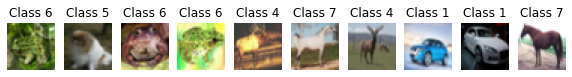

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    print(X_train[i].shape)
    print(np.transpose(X_train[i], (1, 2, 0)).shape)
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))

    plt.title('Class ' + str(y_train[i].item()))

## 모델 설계

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 *3, 512) # 이미지 픽셀, 뉴런
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10) # 클래스가 10개

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # keras의 Flatten과 동일
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

## 모델을 생성하고 Optimizer와 Object Function설정

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## 모델의 성능을 확인하는 함수

In [ ]:
# 훈련과정에서 호출될 함수
def train(model, train_loader, optimizer, log_interval):
    # 모델 훈련 시작
    model.train() 
    # train_loader 에는 학습에 이용되는 이미지 데이터와 레이블 데이터가 Mini Batch 단위로 묶여 저장되어 있음
    # 훈련 데이터의 배치 번호와 이미지 및 레이블을 순회
    for batch_idx, (image, label) in enumerate(train_loader):
        # image와 label을 DEVICE에 할당
        image = image.to(DEVICE)
        label = label.to(DEVICE)

        # 기존에 정의한 장비에 이미지 데이터와 레이블 데이터를 할당할 경우
        # 과거에 이용한 Mini- Batch 내에 있는 이미지 데이터와 레이블 데이터를 
        # 바탕으로 계산된 Loss의 Gradient 값이 optimizer에 할당돼 있으므로 
        # optimizer의 Gradient를 초기화
        optimizer.zero_grad()
        # image를 가지고 예측
        output = model(image)
        # 손실 계산
        loss = criterion(output, label)
        # 손실 역전파
        loss.backward()
        # 파라미터 값(weight)을 업데이트
        ## weight를 업데이트 하고 사용한 optimizer는 None으로 초기화 하는 것!
        ## loss가 적을 때의 weight만 업데이트하고 
        optimizer.step()
#         print(optimizer)
        
        # 출력
        if batch_idx % log_interval == 0:
            print('Train Epoch:{}[{}/{} {:.0f}%]\tTrain Loss:{:.6f}'.
                  format(epoch, batch_idx*len(image), len(train_loader.dataset), 100*batch_idx/len(train_loader), loss.item()))

In [ ]:
EPOCHS

10

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 2000)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n EPOCH : ', epoch, '\nTest Loss : ', test_loss,
          '\n')

Train Epoch:1[0/50000 0%]	Train Loss:2.316306


KeyboardInterrupt: ignored